# Analsis exploratorio de datos

In [3]:
# importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# importamos la base de datos: Data_Casa_Propuesto.csv
df = pd.read_csv('Data_Caso_Propuesto.csv')
df.head(5) # Leer los datos

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN


In [5]:
df.columns

Index(['Codigo', 'Ciudad', 'Departamento', 'Barrio', 'Direccion',
       'Area Terreno', 'Area Construida', 'Detalle Disponibilidad', 'Estrato',
       'Precio', 'Tipo de Inmueble', 'Datos Adicionales'],
      dtype='object')

In [6]:
df.info() # observamos la informacion del contenido de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


## Valores nulos - duplicados

In [12]:
df.isnull().sum() # Revisar valores nulos

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

Encontramos que los valores de Barrio y datos adicionales, presentan un gran volumen de datos faltantes, siendo mas del 91.3% de datos faltantes para barrio y para datos adicionales tiene un 74.4% de datos faltantes, por lo que para este caso pasare a eliminar los datos

In [15]:
# miramos que datos duplicados hay
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
458    False
459    False
460    False
461    False
462    False
Length: 463, dtype: bool

In [17]:
df.duplicated().sum() # permite sumar cuantos datos repetidos hay

0

## Encontrar datos o valores erróneos

In [20]:
df[['Barrio', 'Datos Adicionales']].sample(10)

,Barrio,Datos Adicionales
23,NaN,NaN
39,AV 30 DE AGOSTO,NaN
207,NaN,NaN
143,NaN,NaN
437,NaN,NaN
38,NaN,NaN
454,VEREDA PALERMO,LOTE DE TERRENO QUE HACE PARTE DEL PROYECTO CA...
66,NaN,NO PIERDAS LA OPORTUNIDAD DE UBICAR TU OFICINA...
341,NaN,NaN
286,NaN,NaN


## Eliminación de datos nulos y duplicados

In [23]:
# no se eliminan dados duplicados, por que no hay, no obstante se pone el codigo
df.drop(columns=['Barrio','Datos Adicionales'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Area Terreno            463 non-null    float64
 5   Area Construida         463 non-null    float64
 6   Detalle Disponibilidad  463 non-null    object 
 7   Estrato                 463 non-null    object 
 8   Precio                  463 non-null    float64
 9   Tipo de Inmueble        463 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 36.3+ KB


## Reporte estadístico de los datos numéricos

In [26]:
df.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,463.000000,4.630000e+02,463.000000,4.630000e+02
mean,18003.151188,1.515204e+04,87.517279,6.672032e+08
std,1992.191499,1.827101e+05,1137.469077,3.272992e+09
min,2575.000000,0.000000e+00,0.000000,4.650000e+06
25%,18184.500000,0.000000e+00,0.000000,1.230500e+07
50%,18332.000000,0.000000e+00,0.000000,1.587000e+07
75%,18539.500000,0.000000e+00,0.000000,1.379955e+08
max,19344.000000,3.217197e+06,22724.000000,4.523379e+10


## Identificar valores atipicos

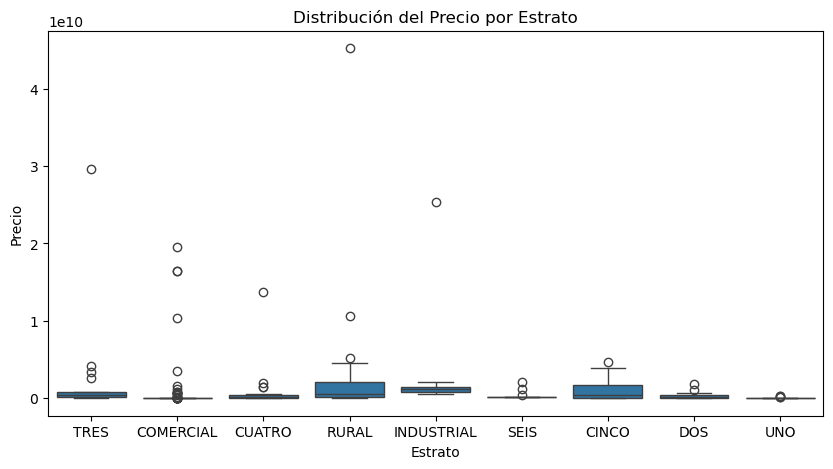

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Estrato', y='Precio', data=df)
plt.title("Distribución del Precio por Estrato")
plt.show()

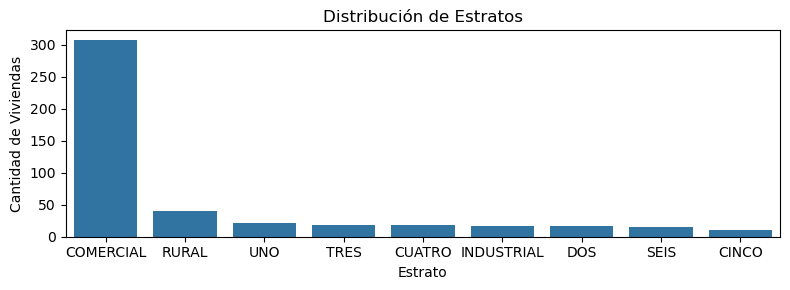

In [31]:
# Conteo de estratos
conteo_estrato = df['Estrato'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 3))
sns.barplot(x=conteo_estrato.index, y=conteo_estrato.values)

# Personalización
plt.title('Distribución de Estratos')
plt.xlabel('Estrato')
plt.ylabel('Cantidad de Viviendas')
plt.tight_layout()
plt.show()

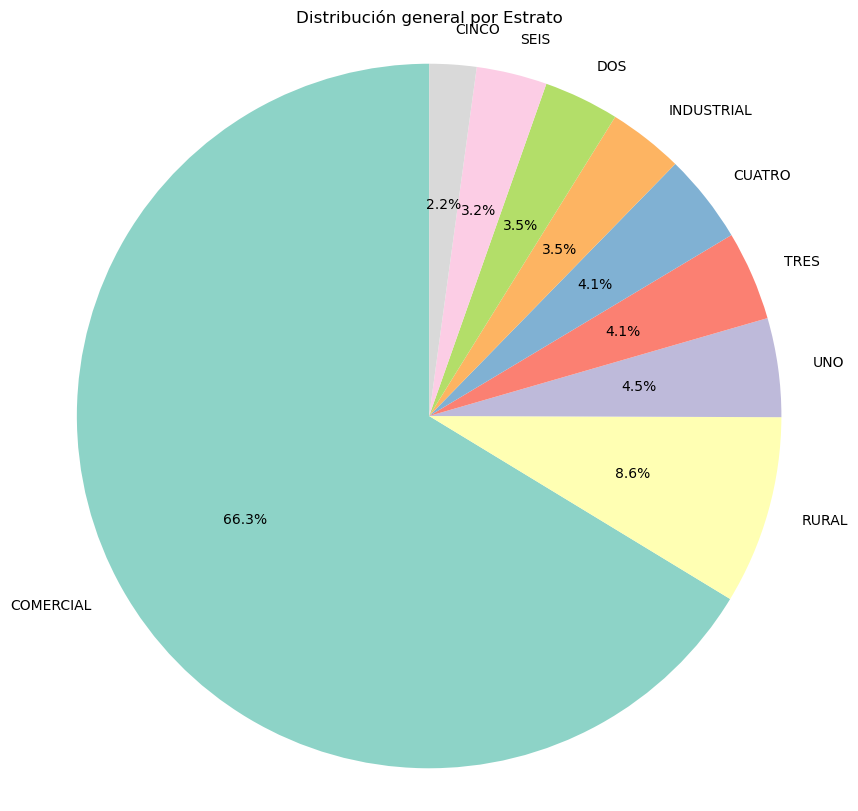

In [33]:
plt.figure(figsize=(10, 10))
plt.pie(conteo_estrato, labels=conteo_estrato.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title("Distribución general por Estrato")
plt.axis('equal')
plt.show()

## Histograma de frecuencia

array([[<Axes: title={'center': 'Codigo'}>,
        <Axes: title={'center': 'Area Terreno'}>],
       [<Axes: title={'center': 'Area Construida'}>,
        <Axes: title={'center': 'Precio'}>]], dtype=object)

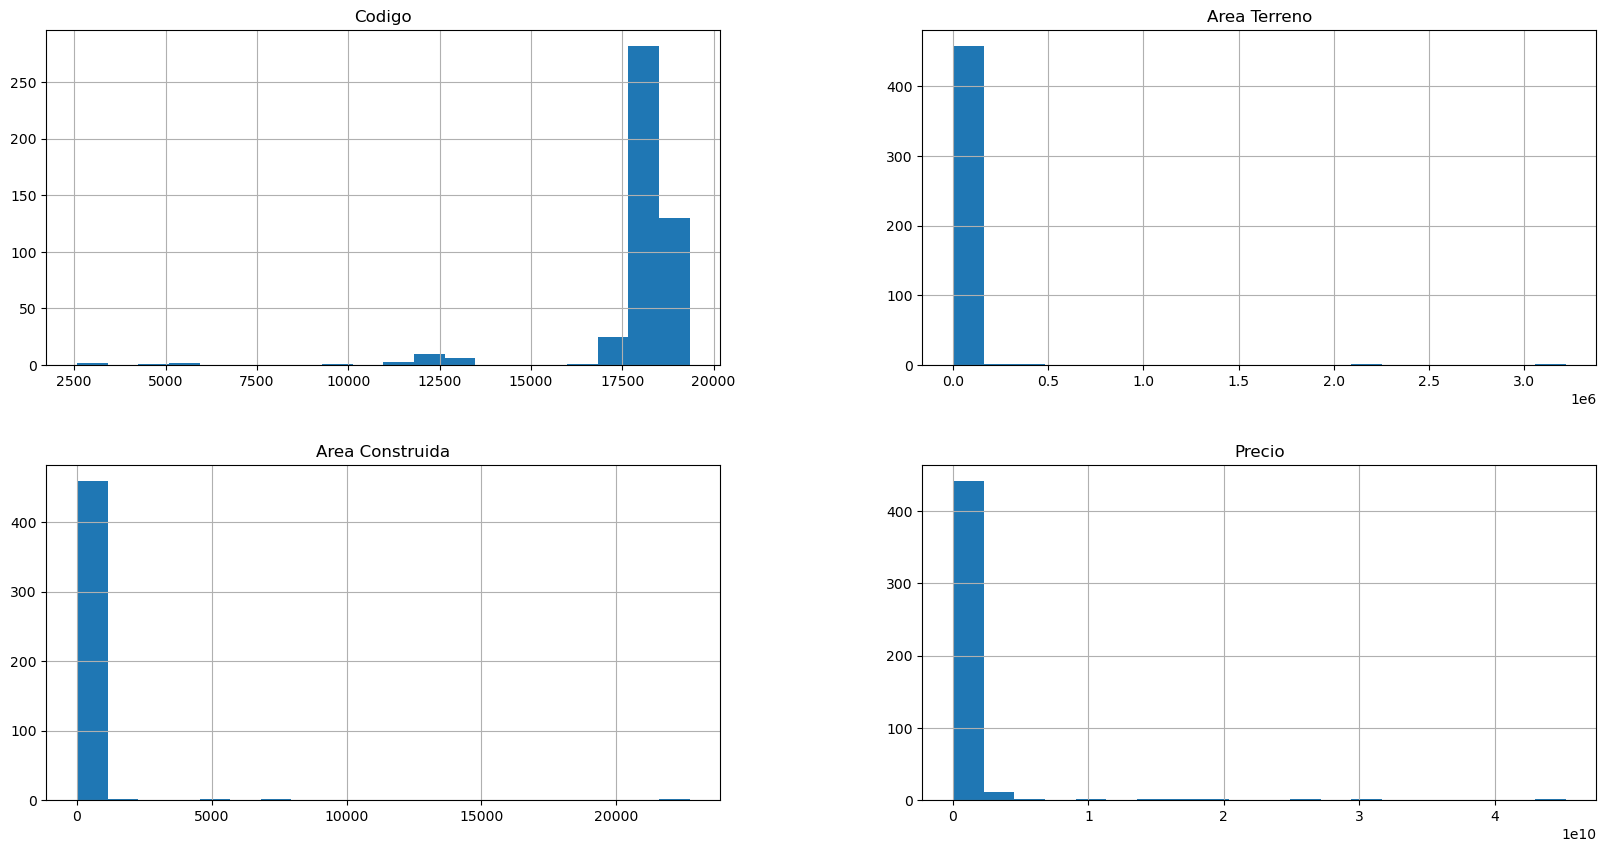

In [38]:
df.hist(bins=20,figsize=(20,10))

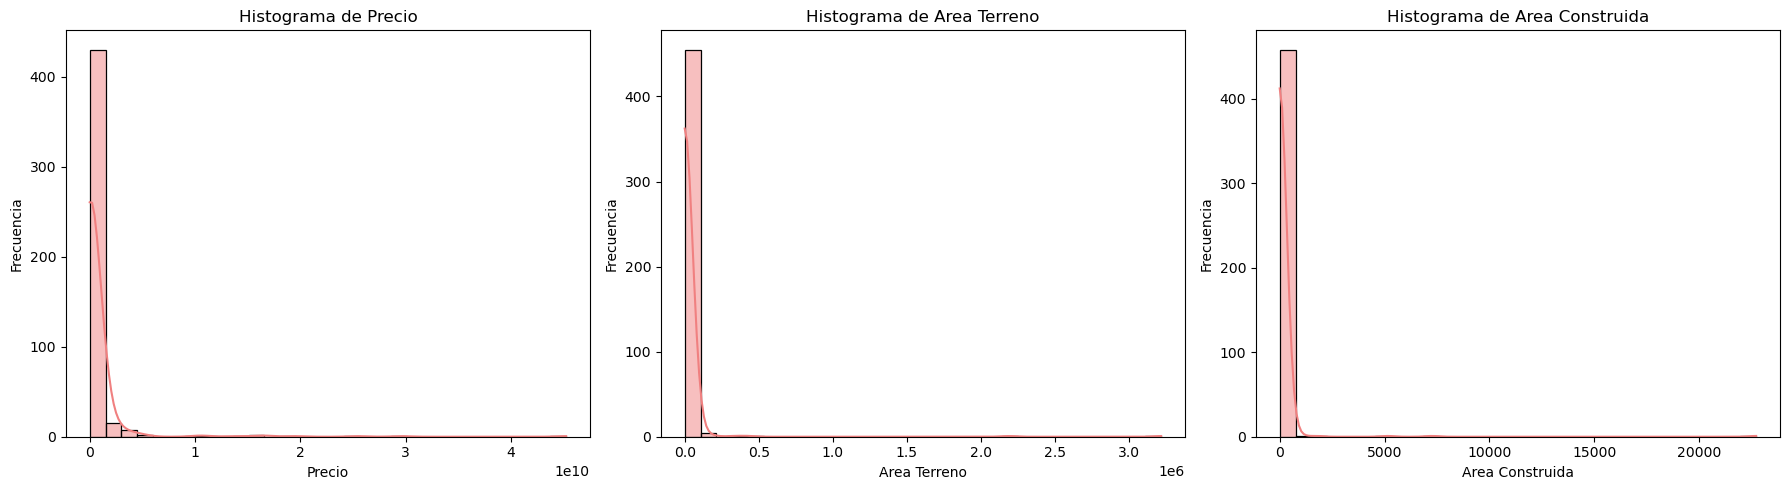

In [40]:
# Columnas a graficar
columnas = ['Precio', 'Area Terreno', 'Area Construida']

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 fila, 3 columnas

# Generar los histogramas
for i, col in enumerate(columnas):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

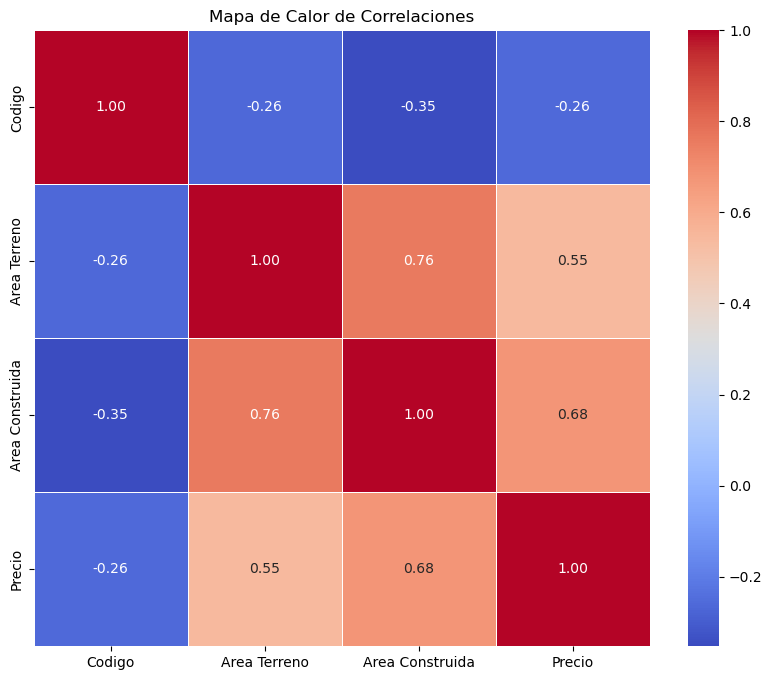

In [81]:
# Calcular la matriz de correlación
correlacion = df.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

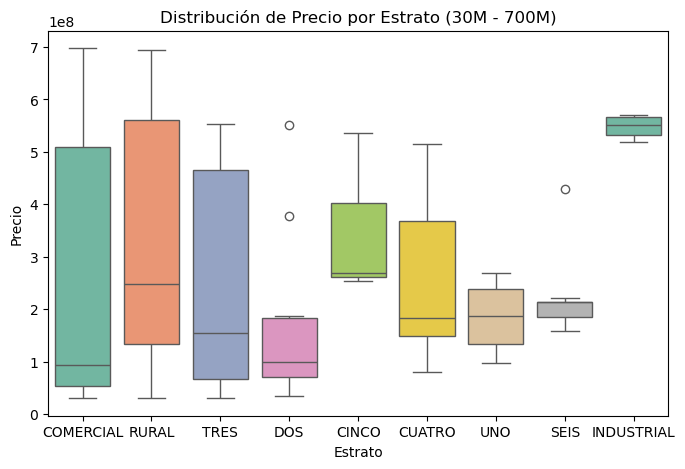

In [83]:
# Filtrar el DataFrame por precios entre 50 y 500 millones
df_filtrado = df[(df['Precio'] >= 30_000_000) & (df['Precio'] <= 700_000_000)]

plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtrado, x='Estrato', y='Precio', hue='Estrato', palette='Set2')
plt.title("Distribución de Precio por Estrato (30M - 700M)")
plt.show()

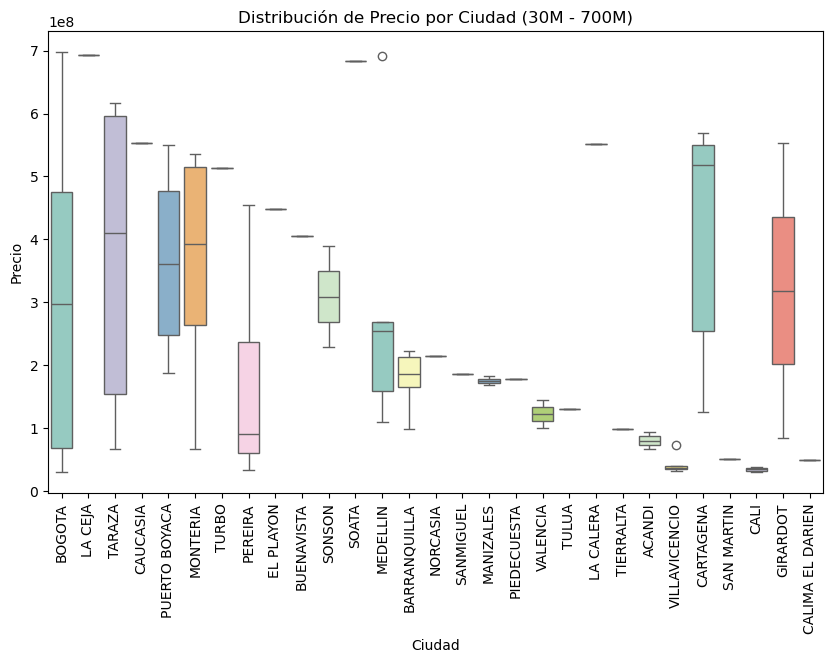

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtrado, x='Ciudad', y='Precio', hue='Ciudad', palette='Set3', legend=False)
plt.title("Distribución de Precio por Ciudad (30M - 700M)")
plt.xticks(rotation=90)
plt.show()

In [87]:
df.sort_values(by='Precio', ascending=True, inplace=True)
df.head (5)

,Codigo,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble
455,17009,VALENCIA,CÓRDOBA,CALLE PRINCIPAL - CORREGIMIENTO GUADUAL,0.0,0.0,COMERCIALIZABLE,RURAL,4650000.0,LOTE AGRICOLA
453,17337,PEREIRA,RISARALDA,CL 69 O ACCESO A CUBA AV 30 DE AGOSTO LOTE ...,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,DOS,6333900.0,LOTE VIVIENDA
451,17336,PEREIRA,RISARALDA,CL 69 Ó ACCESO A CUBA AV 30 DE AGOSTO LOTE 13,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,DOS,6832720.0,LOTE VIVIENDA
450,18447,VILLAVICENCIO,META,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0.0,0.0,COMERCIALIZABLE,COMERCIAL,6835500.0,LOCAL
449,18137,VILLAVICENCIO,META,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0.0,0.0,COMERCIALIZABLE,COMERCIAL,6884500.0,LOCAL


In [89]:
df['Precio'].max()

45233789820.0

In [91]:
df['Precio'].min()

4650000.0

In [119]:
# Crear rangos personalizados
Rangos_Precios = [0, 10_000_000, 100_000_000, 700_000_000, 1_000_000_000, df['Precio'].max()]
Etiquetas = ['Bajo', 'Medio', 'Alto', 'Muy Alto', 'Lujo']

# Crear nueva columna con los rangos de precio
df['Rango_Precio'] = pd.cut(df['Precio'], bins=Rangos_Precios, labels=Etiquetas, include_lowest=True)

# Contar cuántos datos hay por cada rango
conteo_rangos = df['Rango_Precio'].value_counts().sort_index()

In [125]:
df.sample (5)

,Codigo,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Rango_Precio
302,18185,VILLAVICENCIO,META,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.230500e+07,LOCAL,Medio
216,18454,VILLAVICENCIO,META,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0.00,0.0,EN PUJA,COMERCIAL,1.587000e+07,LOCAL,Medio
117,18445,VILLAVICENCIO,META,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0.00,0.0,COMERCIALIZABLE,COMERCIAL,3.133550e+07,LOCAL,Medio
452,11335,CALI,VALLE DEL CAUCA,LT B PARTE DEL PREDIO CHIPICHAPE,430399.68,0.0,COMERCIALIZABLE FIDUCIA,RURAL,1.667784e+09,LOTE VIVIENDA,Lujo
426,18314,VILLAVICENCIO,META,CENTRAL MINORISTA DE ABASTOS DE VILLAVICENCIO ...,0.00,0.0,COMERCIALIZABLE,COMERCIAL,7.350000e+06,LOCAL,Bajo


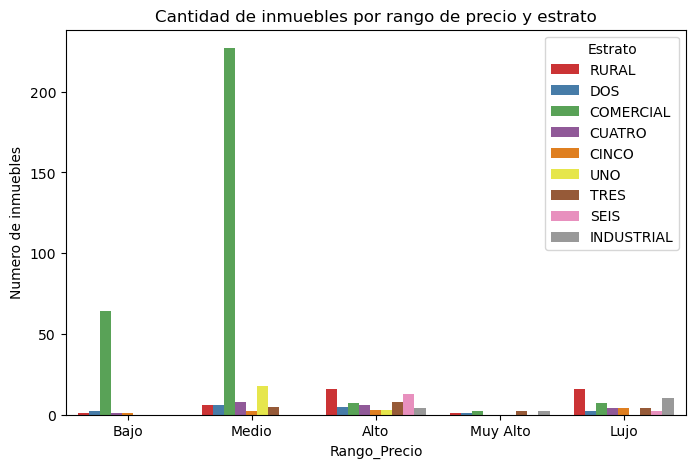

In [127]:
# Visualizar con estrato
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Rango_Precio', hue='Estrato', palette='Set1')
plt.title("Cantidad de inmuebles por rango de precio y estrato")
plt.ylabel("Numero de inmuebles")
plt.show()

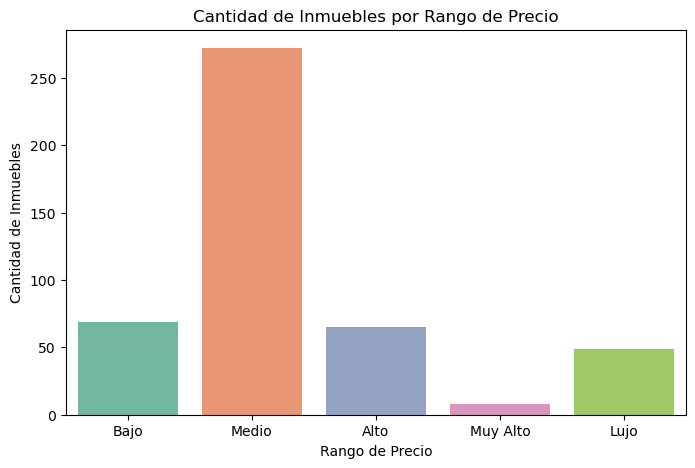

In [129]:
import warnings
warnings.filterwarnings('ignore') # La gráfico actual no necesitas hue

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette='Set2')
plt.title("Cantidad de Inmuebles por Rango de Precio")
plt.xlabel("Rango de Precio")
plt.ylabel("Cantidad de Inmuebles")
plt.show()

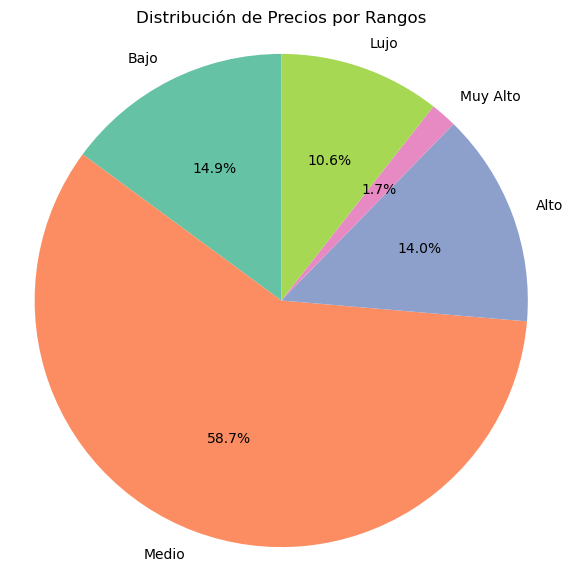

In [133]:
# Graficar diagrama de torta
colores = sns.color_palette('Set2')

plt.figure(figsize=(7, 7))
plt.pie(conteo_rangos, labels=conteo_rangos.index, autopct='%.1f%%', startangle=90, colors=colores)
plt.title("Distribución de Precios por Rangos")
plt.axis('equal')
plt.show()